In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pymorphy2
import matplotlib as mpl



## Очистка данных

Так как при парсинге могут возникнуть ошибки, то очистим текстовые данные от пропусков, эмодзи, непонятных знаков и тд

In [192]:
data = pd.read_csv('data.csv')

In [193]:
data.head(3)

,date,sign,text
0,2004-01-01,aries,"Любые разногласия во мнениях скоро улягутся, а..."
1,2004-01-01,gemini,Первый день нового года прекрасно подходит для...
2,2004-01-01,taurus,Этот день как нельзя лучше подходит для улучше...


### Удалим пропуски и сверхкороткие строки

In [14]:
i=len(data)-1
while i >0: 
    print(i)
    text=str(data['text'][i])
    sign=str(data['sign'][i])
    date=str(data['date'][i])
    if len(sign)<2:
        data=data.drop([i])
        print('deleted sign',i)
    if len(text)<2:
        data=data.drop([i])
        print('deleted text',i)
    if len(date)>13:
        data=data.drop([i])
        print('deleted date',i)
    if date[0]!="2":
        data=data.drop([i])
        print('deleted num2',i)
    i-=1 

chars = set([c for c in text]) # создадим множество из слов, т.е. словарь


-1


### Удалим из текста все, что не текст 

In [194]:
dataset=np.array(data)

In [196]:
for i in range(dataset.shape[0]):
    text=str(dataset[i][2])
    text=text.replace('.','')
    text=text.replace(',','')
    text=text.replace(')','')
    text=text.replace('(','')
    text=text.replace('»','')
    text=text.replace('«','')
    text=text.replace('"','')
    text=text.replace(':','')
    text=text.replace('-',' ')
    text=text.replace('!','')
    text=text.lower()
    dataset[i][2]=text

In [222]:
dataset

array([['2004-01-01', 'aries',
        'любые разногласия во мнениях скоро улягутся а вы продолжайте делать как делали но постарайтесь не наступать на ноги слишком многим иначе ваши сегодняшние действия сыграют против вас в будущем'],
       ['2004-01-01', 'gemini',
        'первый день нового года прекрасно подходит для начинаний которые вы постоянно откладывали в прошлом году отбросьте все сомнения и действуйте упор может быть сделан как на повышение профессиональной квалификации так и на реформацию личной жизни'],
       ['2004-01-01', 'taurus',
        'этот день как нельзя лучше подходит для улучшения состояния здоровья и пополнения физического потенциала посетите тренажерный зал бассейн или начните делать зарядку по утрам'],
       ...,
       ['2020-10-31', 'capricorn',
        'сегодня козероги могут рассчитывать как на неожиданное везение так и на удачу в запланированных обновлениях но звезды советуют придирчивее рассматривать любой подарок судьбы в нем будет изъян или специфи

## Создадим словарь из слов датасета, приведенных к именительному падежу

In [197]:
raw_words=set()
morph = pymorphy2.MorphAnalyzer()

In [ ]:
for i in range(dataset.shape[0]):
    text=str(dataset[i][2])
    text_chars=text.split(' ')
    for  word in text_chars:
        raw_words.add(word)

## Сохраним множество слов

In [200]:
words_list=[]
for word in raw_words:
    words_list.append({'word':word})

words_df=pd.DataFrame(words_list)

In [202]:
#words_df.to_csv('words.csv')

## Посчитаем количество повторений 

То есть посчитаем для каждого слова в каком предложении и сколько раз потворялось. Такой массив имеет размерность 

(количество_предложений, размер_словаря)

In [206]:
words=pd.read_csv('words.csv')

In [208]:
words.head()

,word
0,каждой
1,значимую
2,тупиковой
3,проповедуемым
4,внеплановым


In [209]:
chars=np.array(words)

In [210]:
chars_set=set()
for i,word in enumerate(chars):
    text=morph.parse(word[0])[0].normal_form
    chars_set.add(text)

In [221]:
signs_set=set()
for line in dataset:
    signs_set.add(line[1])
signs_list=[sign for sign in signs_set]
chars_list=[char for char in chars_set]

In [ ]:
stat_data=np.zeros((len(chars_list),len(signs_list)))
for i,line in enumerate(dataset):
    sign=line[1]
    text=str(line[2])
    text=text.split(' ')
    for word in text:
        if word=='':
            continue
        fixed=morph.parse(word)[0].normal_form
        x=chars_list.index(fixed)
        y=signs_list.index(sign)
        stat_data[x][y]+=1

In [234]:
np.save('stat_data', stat_data)
np.save('signs_list', signs_list)
np.save('chars_list', chars_list)

## Выведем полученные статистические данные на диаграмму

Статистика получилась интересная. 
Например, для всех знаков зодиака повторяются первые 10+-2 слов. Также после набора "повторяющихся" слова идет один определенный знак зодиака. Для каждого знака он свой. Это можно интерпретироват как то, что либо у всех знаков есть свой "подходящий знак", либо то,что есть уже заготовленные правила написания гороскопов.  

In [12]:
stat_data = np.load('parsedArrays/stat_data.npy')
signs = np.load('parsedArrays/signs_list.npy')

stat_data_list=list(stat_data)
chars_list = list(np.load('parsedArrays/chars_list.npy'))
signs={'aries':0,'gemini':1,'taurus':2,'cancer':3,'leo':4,'virgo':5,'libra':6,
       'scorpio':7,'sagittarius':8,'capricorn':9,'aquarius':10,'pisces':11}

### Можно поиграться с другими знаками

Для этого нужно поменять переменную sign

In [14]:
sign='aries'  # можно тут поменять знак зодиака на другой, чтобы вывести соответсвующую диаграмму
groups = [i for i in range(len(chars_list))]
counts = np.array([num[signs[sign]] for num in stat_data])
counts_list=list(counts)
sum=counts.sum(axis=0)

In [7]:
counts.sort(axis=0)
N=100
common_vals=counts[::-1]
common_vals=common_vals[:N]

In [8]:
common_indeces=[]

for val in common_vals:
    key=counts_list.index(val)
    common_indeces.append(key)
    
common_words=[]

for index in common_indeces:
    common_words.append(chars_list[index])

C:\Users\Администратор\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


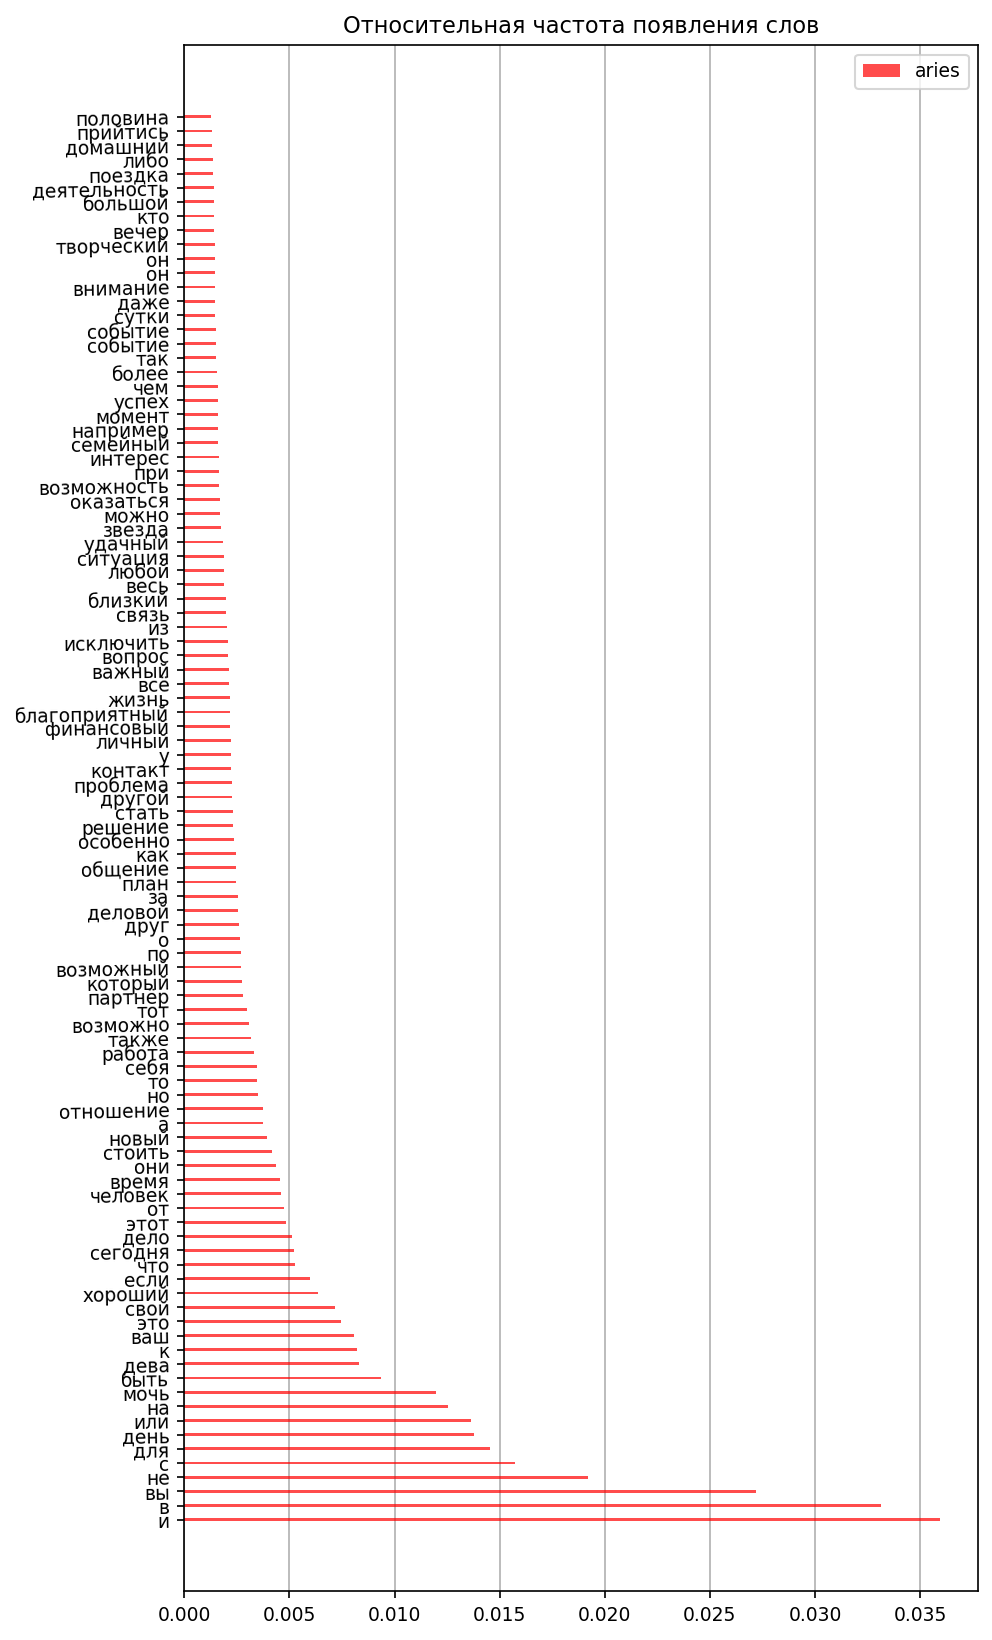

In [15]:
dpi = 150
fig = plt.figure(dpi = dpi, figsize = (1024 / dpi, 2048 / dpi) )
mpl.rcParams.update({'font.size': 9})

plt.title('Относительная частота появления слов')

ax = plt.axes()
ax.xaxis.grid(True, zorder = 1)

x=range(N)
y=common_vals/sum

plt.barh(x, y, height = 0.2, color = 'red', label=sign ,alpha = 0.7, zorder =2)
plt.yticks(range(len(common_words)), common_words, rotation = 1)
plt.legend(loc='upper right')
